# Занятие № 2. Инструменты описательной статиcтики в Jupyter Notebook

### 2.1. Имеется выборка объема 14 значений: 
### $60, 75, 100, 120, 75, 30, 100, 120, 75, 100, 45, 100, 45, 100$. 

### Найдите все эмпирические характеристики.

In [36]:
'''Необходимые статистические библиотеки'''
%pylab inline
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mstats
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import moment
import statsmodels.distributions.empirical_distribution as sm
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [41]:
def ecdf_plot(a, step = 0.001, col = 'black', col2 = 'gray', size = 5, dash=True):
 from statsmodels.distributions.empirical_distribution import ECDF

 f = ECDF(a)
 x = arange(a.min()-1,a.max()+1,step)
 y = f(x)

 for i in range(x.size):
     if ((i + 1) < x.size) and (y[i] != y[i+1]):
         if dash:
             w = np.arange(y[i],y[i+1],step)
             plot(np.full(w.size,x[i]), w, linestyle ='dashed', color = col2, linewidth = 2)
         x[i] = np.nan

 plot(x,y,color=col)

 for i in range(x.size):
     if np.isnan(x[i]):
         plot(x[i-1]+step,y[i],marker='o',color='white',markeredgecolor=col,markersize=size)
         plot(x[i-1]+step,y[i+1],marker='o',color=col,markersize=size)

In [45]:
dataset = np.sort([60,75,100,120,75,30,100,120,75,100,45,100,45,100]) #сортируем исходную выборку
print('Минимальный элемент выборки:', np.min(dataset))
print('Максимальный элемент выборки:', np.max(dataset))
print('Эмпирическая медиана:', np.median(dataset))
print('Эмпирическая дисперсия:', np.var(dataset))
print('Эмпирическое стандартное отклонение', np.std(dataset))
print('Эмпирическая мода:', stats.mode(dataset))
print('Размах выборки:', np.max(dataset)-np.min(dataset))
print('Эмпирический коэффициент асимметрии:',stats.skew(dataset))
print('Эмпирический коэффициент эксцесса:',stats.kurtosis(dataset, fisher=True,bias=True))
print('Сумма =',sum(dataset))

Минимальный элемент выборки: 30
Максимальный элемент выборки: 120
Эмпирическая медиана: 87.5
Эмпирическая дисперсия: 755.7397959183673
Эмпирическое стандартное отклонение 27.49072199703688
Эмпирическая мода: ModeResult(mode=array([100]), count=array([5]))
Размах выборки: 90
Эмпирический коэффициент асимметрии: -0.37091586856917996
Эмпирический коэффициент эксцесса: -1.0113598034503013
Сумма = 1145


In [10]:
moment(dataset, moment=2) #2-й центральный момент

755.7397959183673

In [11]:
moment(dataset, moment=3) #3-й центральный момент

-7706.086005830921

In [12]:
np.percentile(dataset, [25, 50, 75])

array([ 63.75,  87.5 , 100.  ])

In [13]:
mstats.mquantiles(dataset,prob=[0.8])

array([100.])

In [14]:
mstats.mquantiles(dataset,prob=[0.85])

array([109.4])

In [15]:
mstats.mquantiles(dataset,prob=[0.95])

array([120.])

In [16]:
print(stats.cumfreq(dataset, numbins=4, defaultreallimits=(0, 9)))

CumfreqResult(cumcount=array([0., 0., 0., 0.]), lowerlimit=0, binsize=2.25, extrapoints=14)


In [17]:
stats.relfreq(dataset, numbins=4)

RelfreqResult(frequency=array([0.07142857, 0.21428571, 0.57142857, 0.14285714]), lowerlimit=15.0, binsize=30.0, extrapoints=0)

Text(0.5,0,'Гистограмма частот')

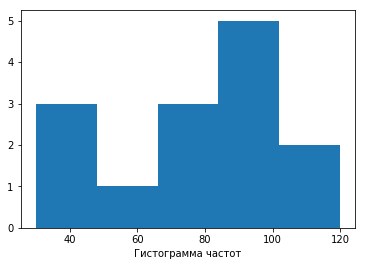

In [21]:
# Гистограмма частот
plt.hist(dataset,bins=5) #ширина
plt.xlabel("Гистограмма частот")

(array([0.13333333, 0.04444444, 0.13333333, 0.22222222, 0.08888889]),
 array([ 30.,  48.,  66.,  84., 102., 120.]),
 <a list of 5 Patch objects>)

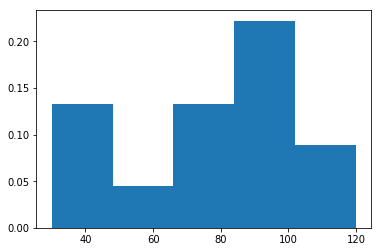

In [23]:
#Гистограмма плотности частот
k = 1 + math.floor(math.log2(len(dataset)))
w1 = np.ones(len(dataset))/((np.max(dataset) - np.min(dataset))/k)
plt.hist(dataset, bins=5, weights=w1)

(array([0.21428571, 0.07142857, 0.21428571, 0.35714286, 0.14285714]),
 array([ 30.,  48.,  66.,  84., 102., 120.]),
 <a list of 5 Patch objects>)

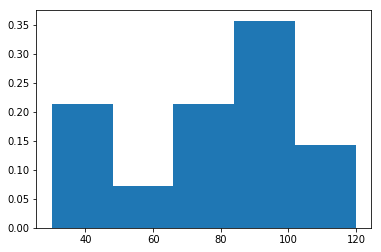

In [25]:
#Гистограмма относительных частот
plt.hist(dataset, bins=5, weights=np.ones(len(dataset))/len(dataset))

Text(0.5,0,'Гистограмма частот')

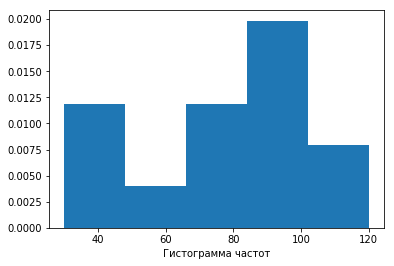

In [26]:
# Гистограмма плотности относительных частот
plt.hist(dataset,bins=5, density=True)
plt.xlabel("Гистограмма частот")

In [28]:
import statsmodels.api as sem 

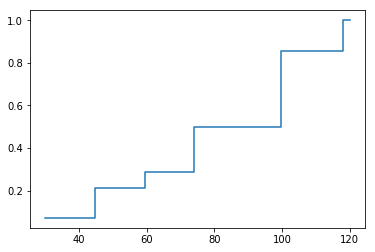

In [29]:
sample = dataset
ecdf = sem.distributions.ECDF(sample)
x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.step(x, y)
plt.show()

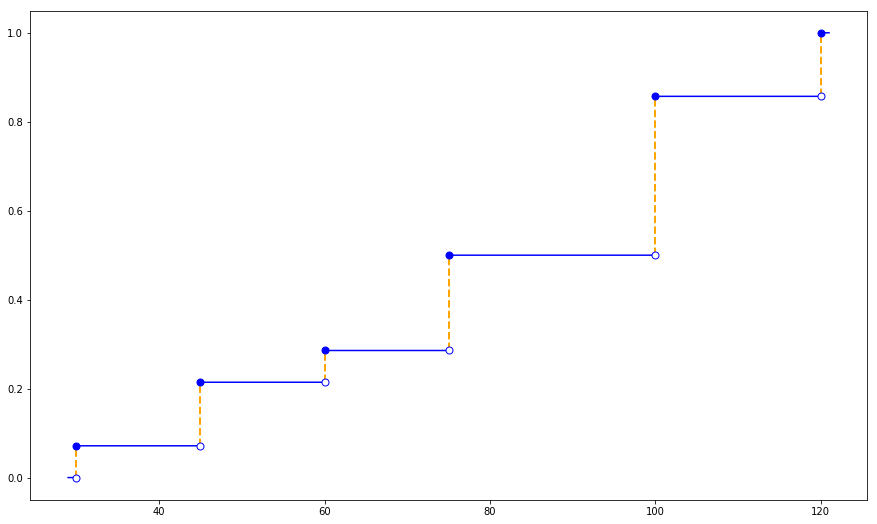

In [42]:
ecdf_plot(dataset,col='blue',col2='orange',size=7,dash=True)

### 2.2. Игральную кость бросили 8 раз. При этом 1 раз выпало 1 очко, 1 раз выпало 2 очка, 2 раза — 3 очка, 1 раз — 4 очка, 2 раза — 5 очков, 1 раз выпало 6 очков. 

### Найдите и постройте эмпирическую функцию распределения $Fˆ_(x)$. Вычислите эмпирическую медиану, первую квартиль $Q_1$, третью квартиль $Q_3$ и межквартильный размах $IQR$.

Из условия получаем отсортированную в порядке возрастания выборку объема 8 значений:
1, 2, 3, 3, 4, 5, 5, 6.

ПРИМЕЧАНИЕ
\begin{equation}
IQR = Q_3 - Q_1
\end{equation}

Эмпирическую функцию распределения изобразим графически, необходимые эмпирические характеристики вычислим с помощью встроенных функций:

Эмпирическая медиана: 3.5
Первый квартиль Q1: 2.75
Третий квартиль Q3: 5.0
Межквартильный размах IQR: 2.25


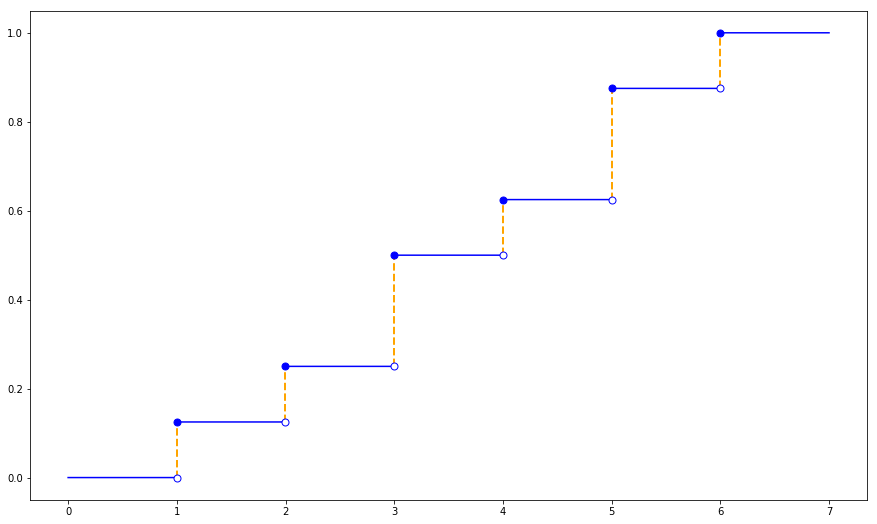

In [56]:
example = array([1,2,3,3,4,5,5,6])
ecdf_plot(example,col='blue',col2='orange',size=7,dash=True)
print('Эмпирическая медиана:', np.median(example))
a = np.percentile(example, [25,75])
print('Первый квартиль Q1:', float(a[0]))
print('Третий квартиль Q3:', float(a[1]))
print('Межквартильный размах IQR:', float(a[1])-float(a[0]))

### 2.3. Пусть $(3; 0; 4; 3; 6; 0; 3; 1)$ - наблюдавшиеся значения выборки. Построить эмпирическую функцию распределения $Fˆ_8(x)$ и найти $F_ˆ8(1)$; $Fˆ_8(3)$ и $Fˆ_8(5)$.

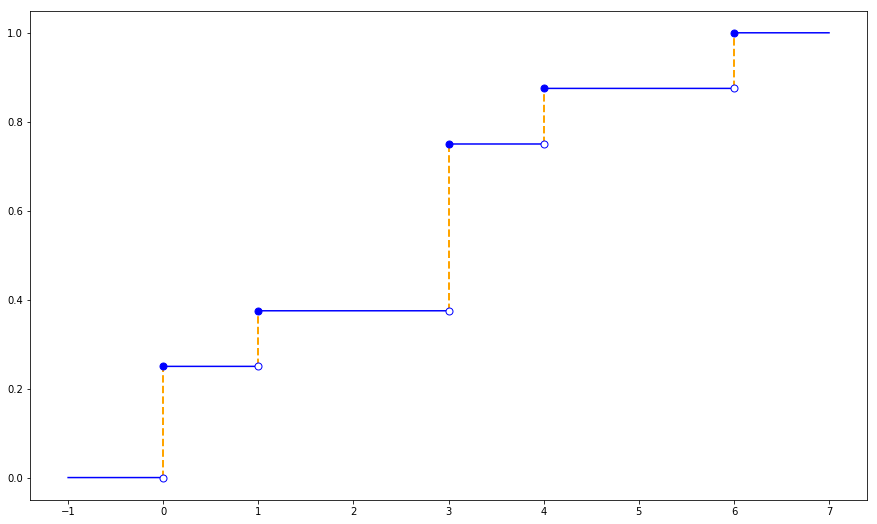

In [57]:
ex = array([3,0,4,3,6,0,3,1])
ecdf_plot(ex,col='blue',col2='orange',size=7,dash=True)

### 2.4. Найти по крайней мере 2 выборки различных объемов, которым соответствует следующая эмпирическая функция распределения (см. рисунок)

### 2.5. В совокупности 16 студентов определены два признака: $X$ – оценка по математике и $Y$ – оценка по иностранному языку. Совместное частотное распределение оценок задано таблицей. Требуется найти эмпирический коэффициент корреляции $ρ(X, Y)$.

### 2.6. Пусть Ω – совокупность студентов из предыдущей задачи. Рассмотрим разбиение Ω = Ω 3 ∪ Ω 4 ∪ Ω 5, где Ω k – множество студентов, получивших по ин. языку оценку Y = k. Требуется найти среднюю групповую и межгрупповую дисперсии признака X (оценки по математике).

### 2.7. Определим медиану абсолютных отклонений (the median of absolute deviations)
### $MAD(x_1, x_2, . . . , x_n)$ = $Med${$|x_1 − Med_n|,..., |x_n − Med_n|$}.
### Найти MAD(−1; 0, 6; −0, 8; 0, 2; 1).

### 2.8. Рассмотрим две выборки $1, 5, 9$ и $2, 4, 6, 8$ со средними $x¯$ и $y¯$. Верно ли, что $\frac{x¯+¯y}{2}$ равно среднему комбинированной выборки из 7 элементов? Аналогично, верно ли, что $\frac{1}{2}(Med_x + Med_y)$ равна медиане комбинированной выборки?

### 2.9. По выборке $X_1, . . . , X_n$ из генеральной совокупности $X$ вычисляется выборочное среднее $X$.
#### a) Случайная величина X распределена по закону Пуассона $Π(λ)$. Найдите $E(X)$ и $Var(X)$. Имеет ли статистика $X$ распределение Пуассона?
#### б) Случайная величина X распределена по равномерному закону $U(a; b)$. Найдите $E(X)$ и $Var(X)$. Имеет ли статистика $X$ равномерное распределение?

### 2.10. Пусть $X_1, . . . , X_{100}$ — выборка из нормального распределения с параметрами $m = 50$, $σ^2 = 25$. Вычисляется выборочное среднее $X$. Найдите:
#### а) закон распределения случайной величины $X$;
#### б) математическое ожидание $E(X)$ и дисперсию $Var(X)$;
#### в) вероятность $P(X < 49)$

### 2.11. Пусть $X_1, X_2, . . . , X_6$ — выборка из равномерного распределения на отрезке $[5; 8]$, $Fˆ(x)$ — соответствующая эмпирическая функция распределения. Найдите:
#### а) вероятность $P(Fˆ(6) = Fˆ(8))$
#### б) вероятность$ P(Fˆ(7) = \frac{1}{2})$

### 2.12. Имеется выборка $X_1, X_2, . . . , X_n$ объема $n$ из генеральной совокупности $F(x)$. Найдите распределения экстремальных статистик $X(1)$ и $X(n)$, т. е. найдите выражения для функций распределения $F_1(x) = P(X_{(1)} < x)$ и $F_n(x) = P(X_{(n)} < x)$ через функцию распределения $F(x)$.

### 2.13. Последовательность значений $(X_k, Y_k)$ случайного вектора $(X, Y)$ представляет собой цифры, стоящие на k-м месте после запятой соответственно чисел $π$ и $e$, $k = 1, 2,...$ . Первые 30 значений представлены в таблице. Найдите эмпирический коэффициент корреляции $\rho_{xy}$.

In [58]:
from sympy import *
from mpmath import *
from mpmath import mp
from pydoc import help
from scipy.stats.stats import pearsonr

In [59]:
mp.dps = 31 # устанавливаем количество цифр в числах после запятой
print('Число π:',mp.pi)
print('Число е:',mp.e) 

Число π: 3.141592653589793238462643383279
Число е: 2.718281828459045235360287471353


In [61]:
pi = np.array([1,4,1,5,9,2,6,5,3,5,8,9,7,9,3,2,3,8,4,6,2,6,4,3,3,8,3,2,7,9])
e = np.array([7,1,8,2,8,1,8,2,8,4,5,9,0,4,5,2,3,5,3,6,0,2,8,7,4,7,1,3,5,2])
Covariance = np.cov(pi, e, bias=True)[0][1]
print('Ковариация:',Covariance)
print(np.cov(pi, e, bias=True))
print(np.corrcoef(pi,e))
CoefCorr = np.corrcoef(pi,e)[0,1]
print('Эмпирический коэффициент корреляции:',CoefCorr)

Ковариация: 1.2000000000000002
[[6.55666667 1.2       ]
 [1.2        7.28888889]]
[[1.         0.17358373]
 [0.17358373 1.        ]]
Эмпирический коэффициент корреляции: 0.1735837348545752
